# Neural Networks
A neural network (NN) is a **machine learning (ML)** model composed of layers of interconnected neurons that transform input features into output values. These layers can be stacked on top of each other to create deep learning models. The network is trained to minimize error using **backpropagation and gradient descent**.
- **Input layer** – receives feature values
- **Hidden layer(s)** – process data using **activation functions** (e.g., ReLU)
- **Output layer** – produces the prediction, with an activation function chosen based on the problem being solved (e.g., softmax for classification)

![NN](https://machinemindscape.com/wp-content/uploads/2024/02/figure-6-1024x536.png)

Each neuron computes a **weighted sum** of inputs, adds a **bias**, and applies an **activation function**:  
<br>
<div align="center">
$ y = f\left(\sum_{i=1}^N w_i x_i + b_i\right) $
</div>

where:
- $ x_i $: input features
- $ w_i $: weights
- $ b_i $: bias
- $ f $: activation function

## Activation Functions
![Activation Functions](https://miro.medium.com/v2/resize:fit:846/1*1IbCPTZtFP4FO0wBC3-Ebw.png)
![Softmax](https://images.contentstack.io/v3/assets/bltac01ee6daa3a1e14/blte5e1674e3883fab3/65ef8ba4039fdd4df8335b7c/img_blog_image1_inline_(2).png)


## Loss Functions
Loss functions measure **how well** the neural network's **predictions match the actual target** values. Different loss functions are used for different types of problems:
- **Classification (e.g., softmax output)**:  
  - **Cross-Entropy Loss**: Measures the difference between the predicted probability distribution and the true distribution.
    
    <br>
    <div align="center">
      $ L_{CE} = - \sum_{i=1}^{C} y_i \log(\hat{y}_i) $
    </div>
  
    where:
      - $ C $ is the number of classes
      - $ y_i $ is the true label (1 for the correct class, 0 otherwise)
      - $ \hat{y}_i $ is the predicted probability for class $i$
  
- **Regression (e.g., linear output)**:  
  - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
  
    <br>
    <div align="center">
      $ L_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $
    </div>

    where:
      - $ N $ is the number of samples
      - $ y_i $ is the true value
      - $ \hat{y}_i $ is the predicted value


## Backpropagation
Backpropagation is the process used to **train a neural network** by minimizing the error between predicted and actual outputs. It works by adjusting the weights and biases in the network using the **gradient of the loss function** with respect to each weight.

Steps:
1. **Forward pass** – The input data is passed through the network to compute the predicted output.
2. **Compute loss** – The difference between the predicted output and the actual target is calculated using a loss function.
3. **Backward pass** – Gradients of the loss with respect to the weights and biases are computed using the chain rule of calculus. This is done for each weight $ w_i $ and bias $ b_i $ in the network:
   
   <br>
   <div align="center">
     $ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w_i} \qquad
       \frac{\partial L}{\partial b_i} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b_i} $
   </div>

4. **Update weights** – The weights and biases are adjusted using an **optimization algorithm** (e.g., **gradient descent**) to minimize the loss:
   
   <br>
   <div align="center">
     $ w_i = w_i - \eta \cdot \frac{\partial L}{\partial w_i} \qquad
       b_i = b_i - \eta \cdot \frac{\partial L}{\partial b_i} $
   </div>
   
   where:
    - $ L $ is the loss function
    - $ y $ is the predicted output
    - $ \eta $ is the learning rate


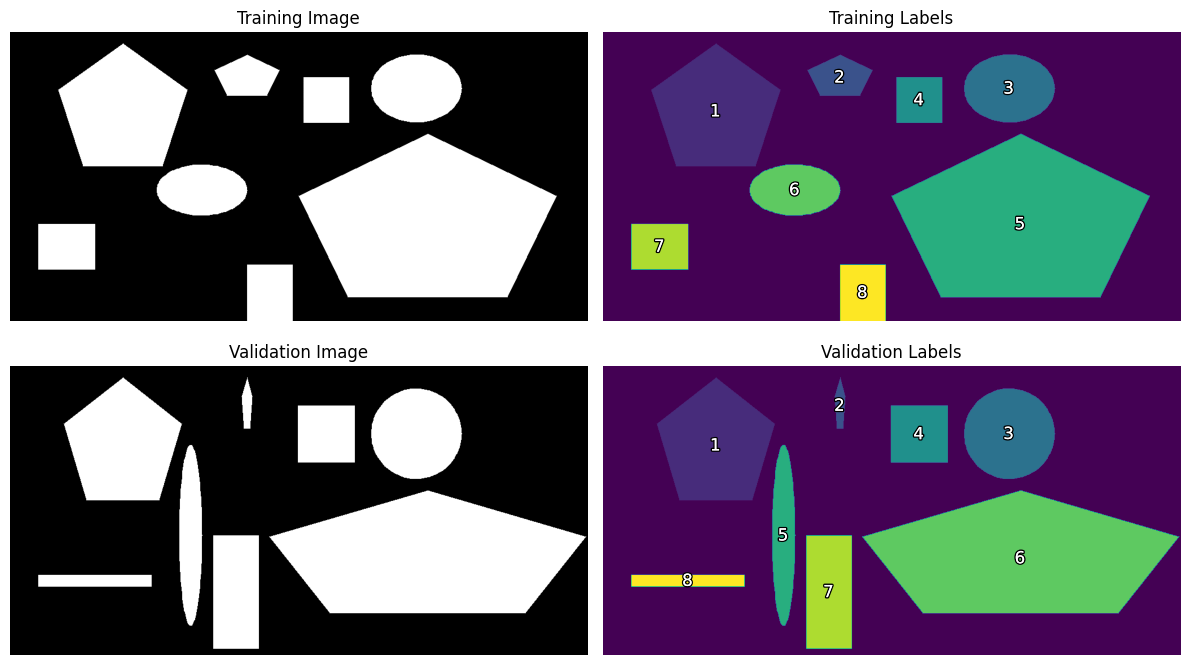

In [1]:
import numpy as np
from skimage import draw, measure
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Function to draw a pentagon
def draw_pentagon(center, size, image, color=255, rotation=0):
    width, height = size
    num_sides = 5
    angle_offset = np.pi / 2 + rotation
    points = []
    
    # Create vertices for the pentagon
    for i in range(num_sides):
        angle = i * 2 * np.pi / num_sides + angle_offset
        x = int(center[0] + (width / 2) * np.cos(angle))
        y = int(center[1] - (height / 2) * np.sin(angle))
        points.append((x, y))
    
    # Draw the pentagon
    rr, cc = draw.polygon([point[1] for point in points], [point[0] for point in points])
    rr = np.clip(rr, 0, image.shape[0] - 1)
    cc = np.clip(cc, 0, image.shape[1] - 1)
    image[rr, cc] = color

# Function to draw a rectangle
def draw_rectangle(center, size, image, color=255, rotation=0):
    width, height = size
    x_center, y_center = center
    half_width = width / 2
    half_height = height / 2

    # Define rectangle corners relative to center
    corners = [
        (-half_width, -half_height),
        (half_width, -half_height),
        (half_width, half_height),
        (-half_width, half_height),
    ]
    
    # Rotate corners around the center
    rotated_corners = []
    for x, y in corners:
        rotated_x = x * np.cos(rotation) - y * np.sin(rotation)
        rotated_y = x * np.sin(rotation) + y * np.cos(rotation)
        rotated_corners.append((x_center + rotated_x, y_center + rotated_y))
    
    # Draw the rectangle
    rr, cc = draw.polygon([int(corner[1]) for corner in rotated_corners], 
                          [int(corner[0]) for corner in rotated_corners])
    rr = np.clip(rr, 0, image.shape[0] - 1)
    cc = np.clip(cc, 0, image.shape[1] - 1)
    image[rr, cc] = color

# Function to draw an ellipse
def draw_ellipse(center, size, image, color=255, rotation=0):
    width, height = size
    radius_x = width / 2
    radius_y = height / 2
    x_center, y_center = center

    # Generate ellipse points
    t = np.linspace(0, 2 * np.pi, 100)
    x = radius_x * np.cos(t)
    y = radius_y * np.sin(t)

    # Apply rotation
    rotated_x = x * np.cos(rotation) - y * np.sin(rotation)
    rotated_y = x * np.sin(rotation) + y * np.cos(rotation)

    # Translate points to the center
    x_final = rotated_x + x_center
    y_final = rotated_y + y_center

    # Draw the ellipse
    rr, cc = draw.polygon(y_final.astype(int), x_final.astype(int), shape=image.shape)
    image[rr, cc] = color

# Image target size
height, width = 512, 1024

# Create a blank images
img_train = np.zeros((height, width), dtype=np.uint8)
img_val = np.zeros((height, width), dtype=np.uint8)

# Train
# - Pentagon
draw_pentagon(center=(420, 80), size=(120, 80), image=img_train)
draw_pentagon(center=(200, 140), size=(240, 240), image=img_train)
draw_pentagon(center=(740, 340), size=(480, 320), image=img_train)
# - Ellipse
draw_ellipse(center=(340, 280), size=(160, 90), image=img_train)
draw_ellipse(center=(720, 100), size=(160, 120), image=img_train)
# - Rectangle
draw_rectangle(center=(100, 380), size=(100, 80), image=img_train)
draw_rectangle(center=(460, 462), size=(80, 100), image=img_train)
draw_rectangle(center=(560, 120), size=(80, 80), image=img_train)
# - Label the objects in the image
labeled_img_train = measure.label(img_train, background=0)
label_names_train = ['pentagon', 'pentagon', 'ellipse', 'rectangle', 'pentagon', 'ellipse', 'rectangle', 'rectangle']

# Val
# - Pentagon
draw_pentagon(center=(420, 70), size=(20, 100), image=img_val)
draw_pentagon(center=(200, 140), size=(220, 240), image=img_val)
draw_pentagon(center=(740, 340), size=(590, 240), image=img_val)
# - Ellipse
draw_ellipse(center=(320, 300), size=(40, 320), image=img_val)
draw_ellipse(center=(720, 120), size=(160, 160), image=img_val)
# - Rectangle
draw_rectangle(center=(150, 380), size=(200, 20), image=img_val)
draw_rectangle(center=(400, 400), size=(80, 200), image=img_val)
draw_rectangle(center=(560, 120), size=(100, 100), image=img_val)
# - Label the objects in the image
labeled_img_val = measure.label(img_val, background=0)
label_names_val = ['pentagon', 'pentagon', 'ellipse', 'rectangle', 'ellipse', 'pentagon', 'rectangle', 'rectangle']


# Display the images side by side using matplotlib
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

# Function to visualize images
def plot_labeled_image(ax_img, ax_label, img, labeled_img, title_img, title_label):
    ax_img.imshow(img, cmap='gray')
    ax_img.set_title(title_img)
    ax_img.axis('off')

    ax_label.imshow(labeled_img)
    ax_label.set_title(title_label)
    ax_label.axis('off')

    # Add numbers at the center of each labeled object
    for region in measure.regionprops(labeled_img):
        cy, cx = region.centroid
        label = str(region.label)
        
        for i, char in enumerate(label):
            txt = ax_label.text(cx + i * 10, cy, char, color='white', fontsize=12, ha='center', va='center')
            txt.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black'),
                                  path_effects.Normal()])

# Plot training images
plot_labeled_image(ax[0, 0], ax[0, 1], img_train, labeled_img_train, 'Training Image', 'Training Labels')

# Plot validation images
plot_labeled_image(ax[1, 0], ax[1, 1], img_val, labeled_img_val, 'Validation Image', 'Validation Labels')

# Show the plot
plt.tight_layout()
plt.show()

### Shape Classification (Individual Work)
**Objective**:
Design and implement a shape classifier by choosing appropriate **object descriptors** and applying a **supervised learning** method using a **Multilayer Perceptron (MLP)**.

**Instructions of one possible approach for the given object shapes**:
1. Prepare Data (Input-Output Pairs):
   - Input:
     - Extract appropriate features based on **Exercise 07** and **08**, i.e., object descriptors.
     - Each object should have a feature vector containing **multiple types** of object descriptions.
   - Output:
     - For each feature vector, assign the corresponding **class index** (a number from $ 0 $ to $ N - 1 $, where $ N $ is the total number of classes).
   - Use `labeled_img_train`/`val` and `label_names_train`/`val` to extract the input-output pairs.
2. Train the Classifier:
   - Use a **Multilayer Perceptron (MLP)** classifier from `sklearn.neural_network.MLPClassifier`.
   - You can modify the architecture using the `hidden_layer_sizes` parameter.
   - **Fit** the classifier to the training data.
3. Evaluation on the Validation Set:
   - **Make predictions** using the trained classifier and **compare the results** with the expected labels.
   - You can use `sklearn.metrics.classification_report` to generate the classification report.

**Hints**:
- Try adjusting the MLP configuration:
   - Number off hidden layers
   - Number of neurons per layer
   - Batch size and maximum iterations _(use at least 1000 iterations)_
- **If needed**, consider applying preprocessing to your feature:
   - Center the data (e.g., subtract mean of training data)
   - Rescale object descriptions (e.g., scale the training data to be between [-1, 1] and then apply the same scaling to the validation data)

**Note**:  
Try to choose feature vectors that are minimal but effective. **Do not use validation data for training the classifier!**

### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [2]:
from sklearn import neural_network, preprocessing, metrics

# Function to extract features for each labeled region
def extract_features(labeled_img):
    features = []
    # The complete code will be provided during the exercise
    
    return np.array(features)

# The complete code will be provided during the exercise
X_train = None   # input - training set
X_val = None     # input - validation set
Y_train = None   # target - training set
Y_val = None     # target - validation set
encoder = None   # optional - you can use preprocessing.LabelEncoder instance to convert class names to numerical indices
clf = None       # classifier - neural_network.MLPClassifier
Y_pred = None    # prediction - validation set

Classification Report:
              precision    recall  f1-score   support

     ellipse       1.00      1.00      1.00         2
    pentagon       1.00      1.00      1.00         3
   rectangle       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



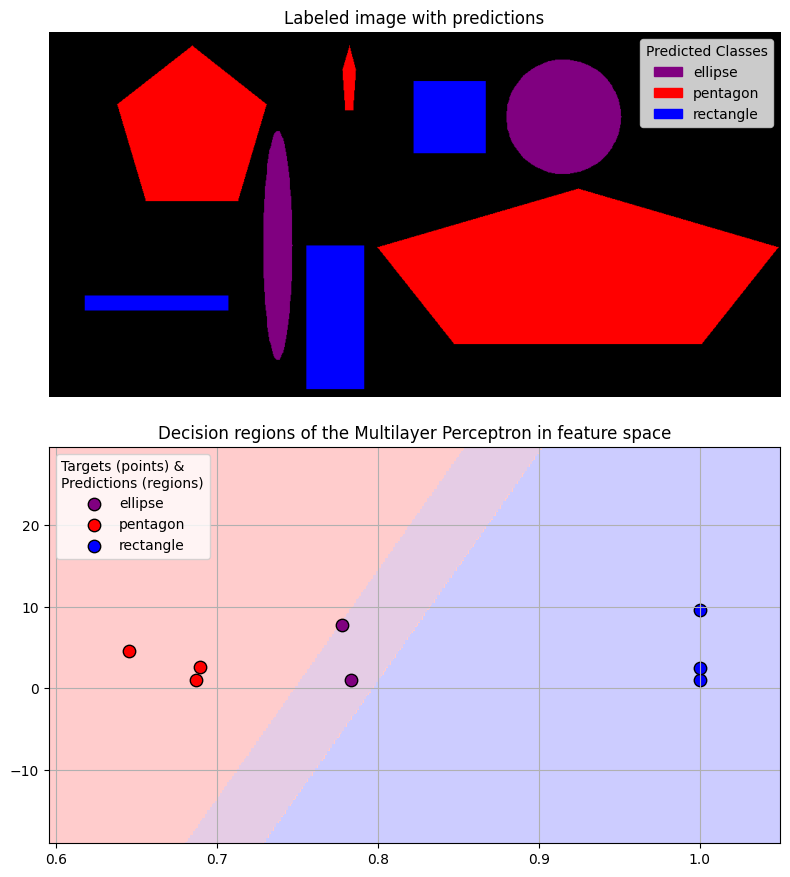

In [3]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Define fixed class colors
class_colors = ['purple', 'red', 'blue']

# Create color image from prediction
colored_img = np.zeros(labeled_img_val.shape + (3,), dtype=np.uint8)      # initialize RGB image
regions = measure.regionprops(labeled_img_val)
for region, pred_label in zip(regions, Y_pred):
    mask = (labeled_img_val == region.label)                              # create a binary mask for the region
    color = mcolors.to_rgb(class_colors[pred_label % len(class_colors)])  # convert to RGB
    colored_img[mask] = (np.array(color) * 255).astype(np.uint8)          # apply color to the region

# Create decision surface
x_min, x_max = X_val[:, 0].min() - 0.05, X_val[:, 0].max() + 0.05  # select min and max value and shift them by 0.05
y_min, y_max = X_val[:, 1].min() - 20, X_val[:, 1].max() + 20      # select min and max value and shift them by 20
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = clf.predict(grid_points).reshape(xx.shape)

# Create combined figure
fig, axes = plt.subplots(2, 1, figsize=(8, 9))

# 1. Labeled image with predictions
axes[0].imshow(colored_img)
axes[0].set_title('Labeled image with predictions')
axes[0].axis('off')
legend_patches = [mpatches.Patch(color=class_colors[i], label=encoder.classes_[i]) for i in range(len(encoder.classes_))]
axes[0].legend(handles=legend_patches, loc='upper right', title='Predicted Classes')

# 2. Decision regions in feature space
axes[1].imshow(
    grid_predictions,
    extent=(x_min, x_max, y_min, y_max),
    origin='lower',
    cmap=mcolors.ListedColormap(class_colors),
    alpha=0.2,
    aspect='auto'
)

for class_index, class_name in enumerate(encoder.classes_):
    idx = np.where(Y_val == class_index)
    axes[1].scatter(
        X_val[idx, 0], X_val[idx, 1],
        label=class_name,
        color=class_colors[class_index % len(class_colors)],
        edgecolor='k', s=80
    )

axes[1].set_xlabel('')  # axis name will be provided during the exercise
axes[1].set_ylabel('')  # axis name will be provided during the exercise
axes[1].set_title('Decision regions of the Multilayer Perceptron in feature space')
axes[1].legend(title='Targets (points) &\nPredictions (regions)', loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### What happens if we use a Multilayer Perceptron (MLP) on an image?

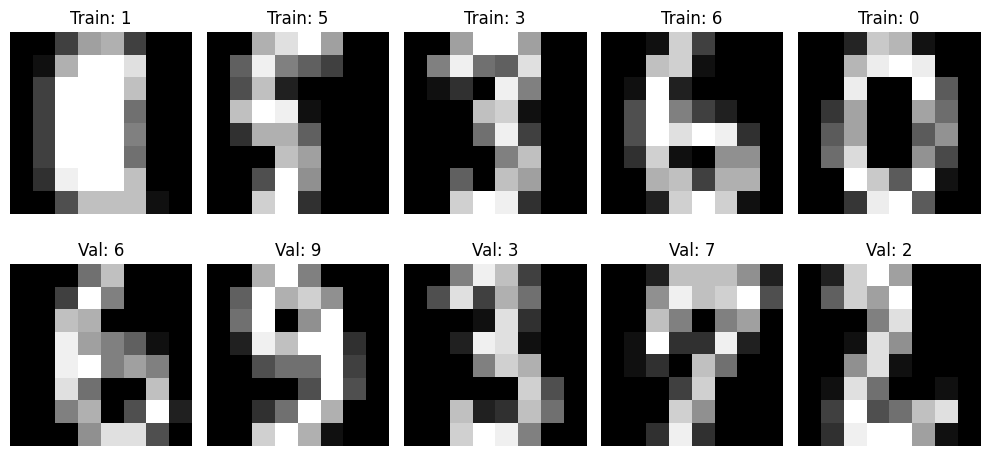

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = datasets.load_digits()

# Split the data into training and validation sets (85:15)
X_train, X_val, Y_train, Y_val = train_test_split(digits.data, digits.target, test_size=0.15, random_state=42)

# Plot 5 examples from the training and 5 examples from the validation set
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Training set examples
for i in range(5):
    axes[0, i].imshow(X_train[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title(f'Train: {Y_train[i]}')
    axes[0, i].axis('off')

# Validation set examples
for i in range(5):
    axes[1, i].imshow(X_val[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title(f'Val: {Y_val[i]}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [5]:
clf = neural_network.MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42
)
clf.fit(X_train, Y_train)

print(f'Final Accuracy: {clf.score(X_val, Y_val) * 100:.2f}%')

Final Accuracy: 98.89%


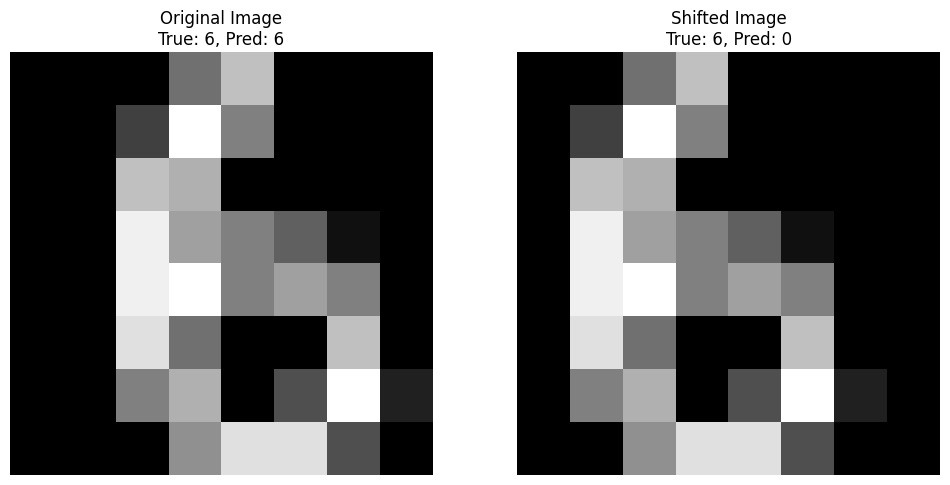

In [6]:
X_test = []
Y_test = []

# Take the first image from X_val and its label
X_test.append(X_val[0].reshape(8, 8))
Y_test.append(Y_val[0])

# Shift the image 1 pixel to the left (move values to the left and fill empty spots with zeros)
X_test.append(np.roll(X_test[0], shift=-1, axis=1))
Y_test.append(Y_val[0])

# Plotting the original and shifted images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(X_test[0], cmap='gray')
axes[0].set_title(f'Original Image\nTrue: {Y_test[0]}, Pred: {clf.predict([X_test[0].flatten()])[0]}')
axes[0].axis('off')

# Plot the shifted image
axes[1].imshow(X_test[1], cmap='gray')
axes[1].set_title(f'Shifted Image\nTrue: {Y_test[1]}, Pred: {clf.predict([X_test[1].flatten()])[0]}')
axes[1].axis('off')

plt.show()

**Note**:  
The MLP classifier struggles with spatial dependencies because it uses **fully-connected layers**. This makes the model sensitive to pixel positions, as it has not learned translation invariance.

Therefore, **Convolutional Neural Networks (CNNs)** are a better choice for image data. CNNs capture **spatial hierarchies** through convolutional layers, making them more robust to object positions and improving performance on image classification tasks.

## Convolutional Neural Networks (CNN)
**CNNs** are a type of neural network designed mainly for **image data**. Unlike classic **fully-connected (dense)** layers, they use special layers that capture **spatial patterns** in the data. They typically consist of:

- **Convolutional Layer**
  - Applies small **filters** (e.g., 3×3) over the input image
  - Each filter learns to detect **features** like edges, textures, shapes, colors
- **Pooling Layer**
  - **Reduces spatial dimensions** (e.g., from 4×4 to 2×2), which helps with **regularization** and improves computational efficiency
  - Common types:
    - **Max pooling** - selects the maximum value in a region
    - **Average pooling** - computes the average value in a region

![CNN](https://miro.medium.com/v2/resize:fit:1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)  
![CNN-layers](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-024-51258-6/MediaObjects/41598_2024_51258_Fig1_HTML.png)

### Digit Classification with CNN (Individual Work)
**Objective**:
Design and implement a simple **Convolutional Neural Network (CNN)** in **PyTorch** to classify grayscale digit images.
Your task is to complete the definition of the `SimpleCNN` class — initialize layers and activation function in `__init__`, and implement the `forward(self, x)` method to transform input images into output predictions.

**Hints**:
- You can use the following layers: 
  - Convolutional: `nn.Conv2d`
  - Pooling: `nn.MaxPool2d`, `nn.AvgPool2d`
  - Fully-Connected: `nn.Linear`
- Use `nn.Flatten` to convert a 2D feature map into a 1D vector before passing it to fully-connected layers.
- Activation functions like `nn.ReLU`, `nn.Sigmoid`, etc. are also available in the `nn` module

**Note**:  
If needed, you may modify `num_epochs`, the optimizer (e.g., change learning rate `lr`), or enable training logs via the `print_progress` flag.

### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [7]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Normalize the data (already loaded as X_train, Y_train, X_val, Y_val)
scaler = StandardScaler()
X_train_tensor = scaler.fit_transform(X_train)
X_val_tensor = scaler.transform(X_val)

# Reshape the data for CNN (adding channel dimension)
X_train_tensor = X_train_tensor.reshape(-1, 1, 8, 8)  # (batch_size, width * height) -> (batch_size, channel, height, width)
X_val_tensor = X_val_tensor.reshape(-1, 1, 8, 8)      # (batch_size, width * height) -> (batch_size, channel, height, width)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_tensor, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_tensor, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, input_channels: int = 1, num_classes: int = 10):
        super(SimpleCNN, self).__init__()
        # The complete code will be provided during the exercise

    def forward(self, x):
        # The complete code will be provided during the exercise
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
print_progress = False
best_val_accuracy = 0  # track the best validation accuracy
model_best = None      # variable to store the best model
if print_progress:
    print('Training:')
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    if print_progress:
        print(f'- Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')
    
    # Save the model if it has the best validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        model_best = copy.deepcopy(model.state_dict())

# Load the best model's state
model.load_state_dict(model_best)

# Evaluate the best model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total
print(f'Final Accuracy: {val_accuracy:.2f}%')

Final Accuracy: 99.26%


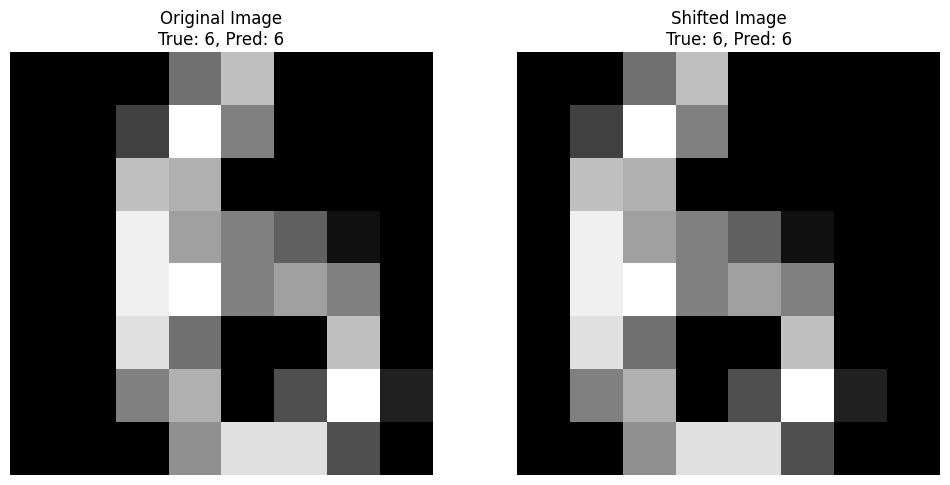

In [8]:
# Now we apply scaling and reshape back to image format for both the original and shifted images
X_test_tensor = []

# Scale original image
[X_test_tensor.append(
    scaler.transform(x.reshape(1, -1)).reshape(1, 1, 8, 8)
) for x in X_test]

# Convert to torch tensors
X_test_scaled = [torch.tensor(x, dtype=torch.float32) for x in X_test_tensor]

# Make predictions with the model
model.eval()
predictions = []

with torch.no_grad():
    for x in X_test_scaled:
        output = model(x)                    # get the model's prediction
        _, predicted = torch.max(output, 1)  # get the predicted class
        predictions.append(predicted.item())

# Plotting the original and shifted images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(X_test[0], cmap='gray')
axes[0].set_title(f'Original Image\nTrue: {Y_test[0]}, Pred: {predictions[0]}')
axes[0].axis('off')

# Plot the shifted image
axes[1].imshow(X_test[1], cmap='gray')
axes[1].set_title(f'Shifted Image\nTrue: {Y_test[1]}, Pred: {predictions[1]}')
axes[1].axis('off')

plt.show()

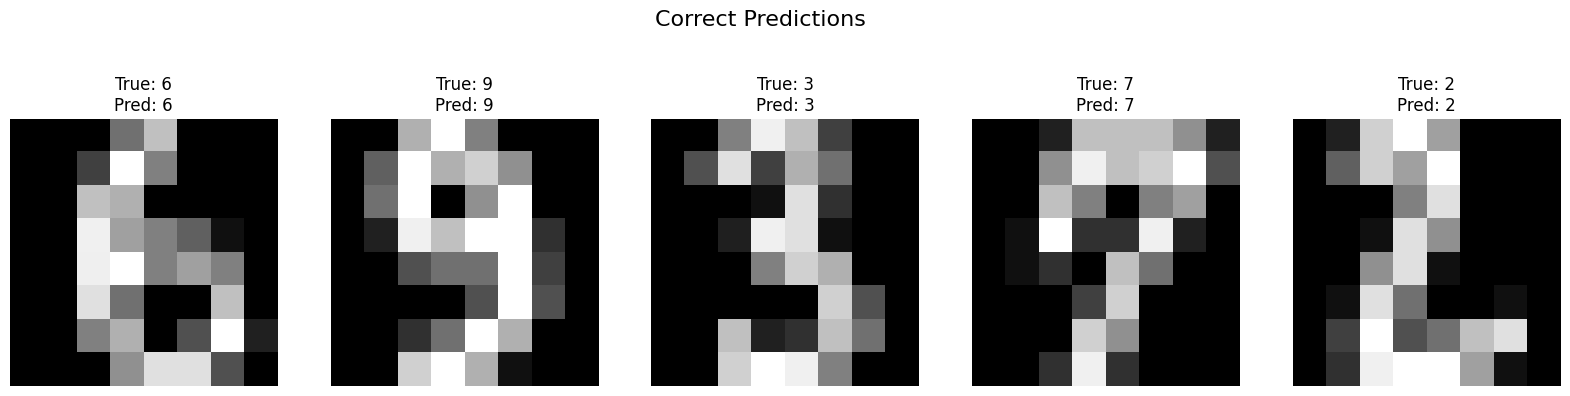

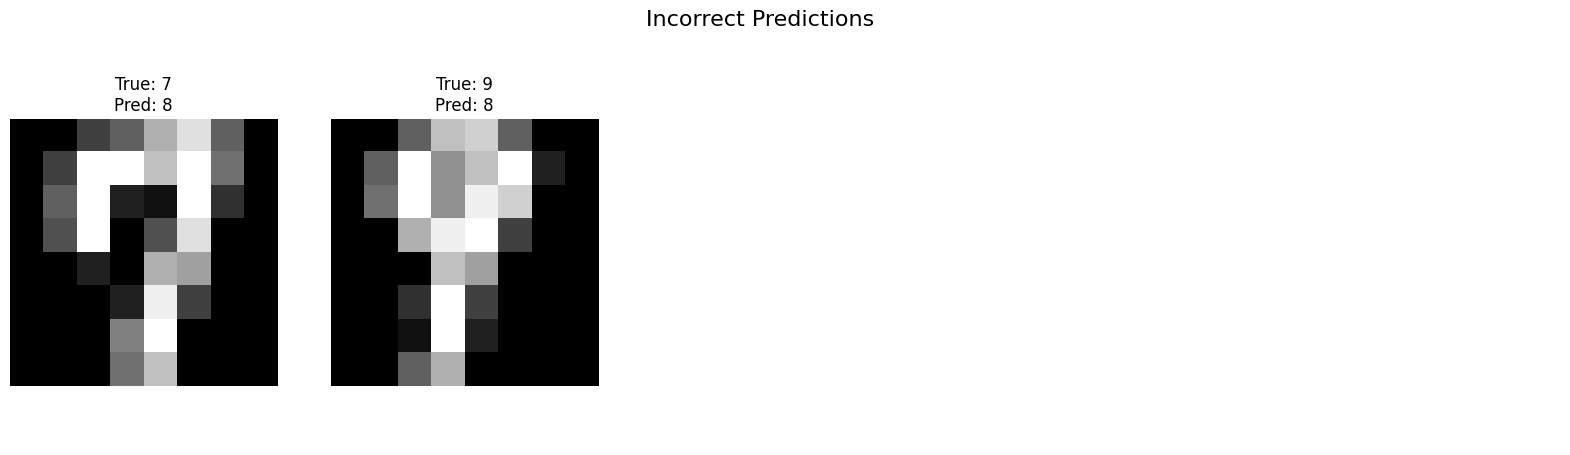

In [9]:
# Function to plot images with correct and incorrect classifications
def plot_classifications(model, data_loader, num_images=10, figsize=(20, 5)):
    model.eval()           # set the model to evaluation mode
    correct_images = []
    incorrect_images = []

    # Loop through the data loader to get some images
    with torch.no_grad():
        total = 0
        for inputs, labels in data_loader:
            # Inverse transform the inputs to get them back to the original scale
            inputs_rescaled = scaler.inverse_transform(inputs.view(inputs.size(0), -1).cpu().numpy())
            inputs_rescaled = inputs_rescaled.reshape(inputs.size(0), 1, 8, 8)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            # Identify correct and incorrect predictions
            for i in range(len(labels)):
                if predicted[i] == labels[i]:
                    correct_images.append((inputs_rescaled[i], labels[i], predicted[i]))
                else:
                    incorrect_images.append((inputs_rescaled[i], labels[i], predicted[i]))
                total += 1

            # Stop when we have enough images
            if len(correct_images) >= num_images and len(incorrect_images) >= num_images:
                break

    # Plot correctly classified images
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    fig.suptitle('Correct Predictions', fontsize=16)
    for i in range(num_images):
        if i < len(correct_images):
            image, label, pred = correct_images[i]
            ax = axes[i]
            ax.imshow(image[0], cmap='gray')
            ax.set_title(f'True: {label.item()}\nPred: {pred.item()}')
            ax.axis('off')
        else:
            ax = axes[i]
            ax.axis('off')

    plt.show()

    # Plot incorrectly classified images
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    fig.suptitle('Incorrect Predictions', fontsize=16)
    for i in range(num_images):
        if i < len(incorrect_images):
            image, label, pred = incorrect_images[i]
            ax = axes[i]
            ax.imshow(image[0], cmap='gray')
            ax.set_title(f'True: {label.item()}\nPred: {pred.item()}')
            ax.axis('off')
        else:
            ax = axes[i]
            ax.axis('off')

    plt.show()

# Example usage (using validation data)
plot_classifications(model, val_loader, num_images=5)

# Next week - 3rd writing test!